## Assignment4

Random Dataset Created:
    Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col21  \
0   103   180    93    15   107    72   189    21   103    122  ...     88   
1    89    49    59   170   188    15   190   190   175    190  ...     18   
2    92   111   188   199   172     8   175    35    81    164  ...    146   
3    40    82   111    53    24   154   188   124    41    157  ...    139   
4   135    72    12   162    33    48   151    62    37     99  ...    103   

   Col22  Col23  Col24  Col25  Col26  Col27  Col28  Col29  Col30  
0    158     38    130    192    188     21    161     58     22  
1    132     89     60     14      9     90     53    130     84  
2     44    162    190     14     95     48     15    200    190  
3     81    136    163    163     33    123      5     41     28  
4     27    137     15     90     42    124    179     63     96  

[5 rows x 30 columns]

Dataset after replacing values [10,60] with NA:
     Col1   Col2   Col3   Col4  

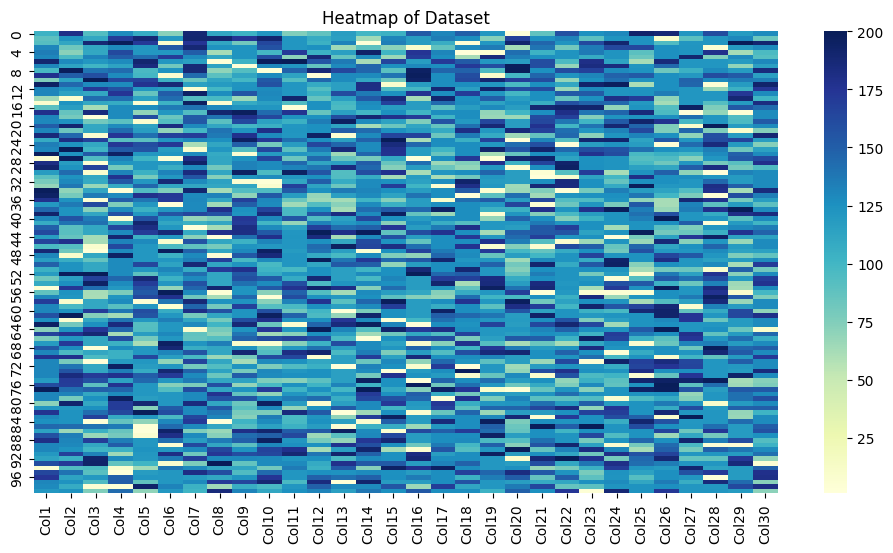


Number of column pairs with correlation <= 0.7: 870

Normalized Dataset:
        Col1      Col2      Col3       Col4      Col5      Col6      Col7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

       Col8      Col9     Col10  ...     Col21     Col22     Col23     Col24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  

C:\Users\adeep\AppData\Local\Temp\ipykernel_2788\2813485649.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)  # c. Binary transformation


<Figure size 1200x600 with 0 Axes>

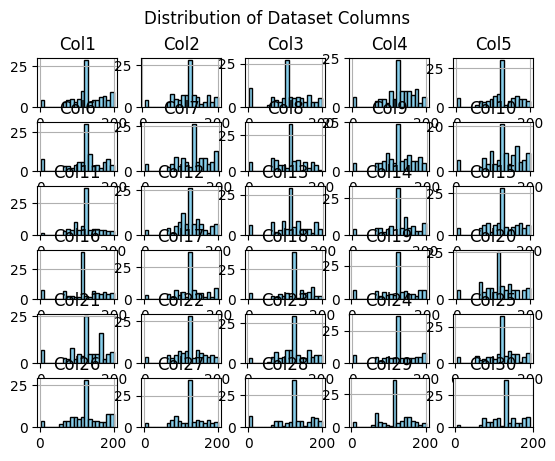

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Step 1: Create random dataset (100 rows x 30 columns, values 1-200)

np.random.seed(42)  # For reproducibility
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f"Col{i+1}" for i in range(30)])
print("Random Dataset Created:\n", df.head())


# Step 2: Replace values between 10 and 60 with NA

df_masked = df.mask((df >= 10) & (df <= 60))  # c. Replace values with NA
print("\nDataset after replacing values [10,60] with NA:\n", df_masked.head())


# Step 3: Count of NA in each row and column

na_per_row = df_masked.isna().sum(axis=1)  # c. Count NA per row
na_per_col = df_masked.isna().sum(axis=0)  # c. Count NA per column
print("\nNA count per row:\n", na_per_row.head())
print("\nNA count per column:\n", na_per_col)


# Step 4: Replace NA with column mean

df_filled = df_masked.fillna(df_masked.mean())  # c. Replace NA with column mean
print("\nDataset after replacing NA with column mean:\n", df_filled.head())


# Step 5: Plot heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df_filled, cmap="YlGnBu")
plt.title("Heatmap of Dataset")
plt.show()  # c. Heatmap visualization


# Step 6: Count columns with correlation <= 0.7

cor_matrix = df_filled.corr()
low_corr_count = (cor_matrix < 0.7).sum().sum()  # c. Count columns with corr <= 0.7
print(f"\nNumber of column pairs with correlation <= 0.7: {low_corr_count}")


# Step 7: Normalize each column between 0 and 10

scaler = MinMaxScaler(feature_range=(0,10))  # c. Initialize MinMaxScaler
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)
print("\nNormalized Dataset:\n", df_normalized.head())


# Step 8: Replace values <=5 with 0 else 1

df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)  # c. Binary transformation
print("\nBinary Dataset (<=5:0, >5:1):\n", df_binary.head())


# Step 9: Visualize the distribution of dataset

plt.figure(figsize=(12,6))
df_filled.hist(bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Dataset Columns")
plt.show()  # c. Histogram of dataset
